In [3]:
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch

In [4]:
eshop = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\E-Commerce\Sample-Superstore3.csv')
path = r'C:\\Asus WebStorage\\psabin@gmail.com\\MySyncFolder\\Data Science Course\\E-Commerce\\'
eshop_db = sqlite3.connect('eshop_database.db')
c = eshop_db.cursor()

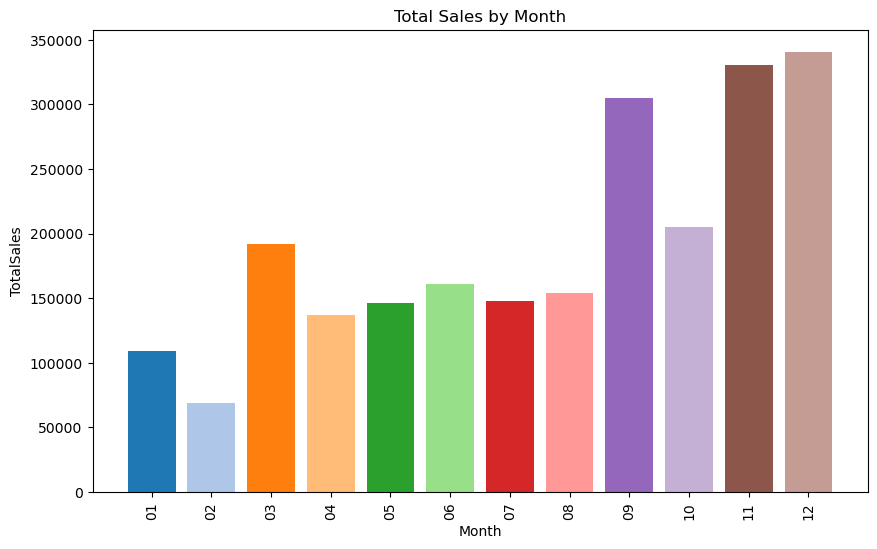

In [8]:
# Execute the query
c.execute('''
SELECT 
    strftime('%m', OrderDate) AS Month, ROUND(SUM(Sales),2) AS TotalSales
FROM 
    OrderDetails
JOIN Orders ON Orders.OrderID=OrderDetails.OrderID          
GROUP BY 
    strftime('%m', OrderDate);''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Month', 'TotalSales'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Month'], df['TotalSales'], color=[colors(i % 12) for i in range(len(df))])
plt.xlabel('Month')
plt.ylabel('TotalSales')
plt.xticks(rotation=90)
plt.title('Total Sales by Month')

plt.show()

December, November, September, October, March are the strongest sales months

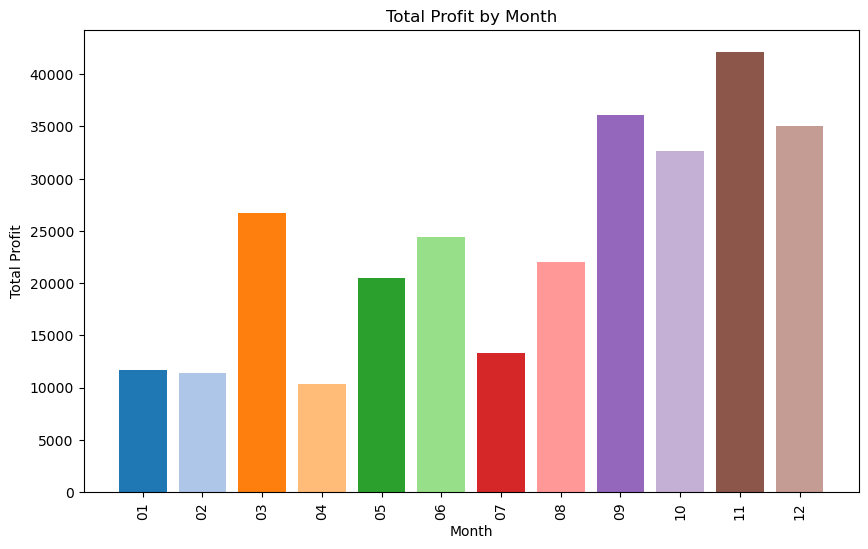

In [9]:
# Execute the query
c.execute('''
SELECT 
    strftime('%m', OrderDate) AS Month, ROUND(SUM(Profit),2) AS TotalProfit
FROM 
    OrderDetails
JOIN Orders ON Orders.OrderID=OrderDetails.OrderID          
GROUP BY 
    strftime('%m', OrderDate);''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Month', 'TotalProfit'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Month'], df['TotalProfit'], color=[colors(i % 12) for i in range(len(df))])
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.title('Total Profit by Month')

plt.show()